# Diwali_Sales_Analysis

This project is about detailed analysis of sales during Diwali(Indian Festival) across all over india.

In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.sample(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
1196,1004215,Lycoris,P00227142,F,26-35,34,0,Delhi,Central,Media,Footwear & Shoes,3,16664.0,NaN,NaN
10522,1001173,Ginny,P00005142,M,26-35,31,0,Rajasthan,Northern,Lawyer,Household items,4,2361.0,NaN,NaN
9349,1005459,Skye,P00276742,M,0-17,12,0,Punjab,Northern,IT Sector,Food,1,4204.0,NaN,NaN
1448,1003768,Braxton,P00084842,M,26-35,28,1,Himachal Pradesh,Northern,IT Sector,Footwear & Shoes,3,16318.0,NaN,NaN
7751,1002661,Hart,P00219242,F,55+,81,0,Uttar Pradesh,Central,Media,Decor,4,6179.0,NaN,NaN
964,1001873,Lauren,P00220442,F,36-45,40,1,Maharashtra,Western,Chemical,Food,3,18959.0,NaN,NaN
4908,1005482,Daksh,P00249642,F,18-25,20,1,Madhya Pradesh,Central,Banking,Clothing & Apparel,3,8790.0,NaN,NaN
8311,1004334,Akash,P00112542,F,26-35,30,0,Maharashtra,Western,Aviation,Electronics & Gadgets,1,5845.0,NaN,NaN
2482,1005851,Sakshi,P00031042,M,18-25,20,0,Maharashtra,Western,IT Sector,Sports Products,2,13583.0,NaN,NaN
4363,1003648,Amit,P00320742,F,18-25,21,1,Uttar Pradesh,Central,Food Processing,Electronics & Gadgets,1,9888.0,NaN,NaN


In [5]:
#drop unrelated/blank columns(NAN)
df.drop(['Status', 'unnamed1','Cust_name','User_ID'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        11251 non-null  object 
 1   Gender            11251 non-null  object 
 2   Age Group         11251 non-null  object 
 3   Age               11251 non-null  int64  
 4   Marital_Status    11251 non-null  int64  
 5   State             11251 non-null  object 
 6   Zone              11251 non-null  object 
 7   Occupation        11251 non-null  object 
 8   Product_Category  11251 non-null  object 
 9   Orders            11251 non-null  int64  
 10  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 967.0+ KB


Column Amount contains 12 null values 

**Mainly there are two ways to deal with null values or missing values:**
1. Remove the rows having missing values ( which result in loss of data for other attributes)
2. Replacing it by some other value.For example we can replace it by Mean/median .

1. Replacing the values with mean 

In [7]:
if df['Amount'].isnull().any():
    df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [8]:
df.columns

Index(['Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

**Numerical Features Analysis**

In [9]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,Age,Marital_Status,Orders,Amount
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,35.421207,0.420318,2.489290,9453.610858
std,12.754122,0.493632,1.115047,5219.569870
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.500000,5443.500000
50%,33.000000,0.000000,2.000000,8110.000000
75%,43.000000,1.000000,3.000000,12671.000000
max,92.000000,1.000000,4.000000,23952.000000


In [10]:
def plot_hist(df,column_name):
    plt.figure(figsize=(5,2))
    sns.histplot(df[column_name],kde=True)
    plt.title(f'Distribution of {column_name}')

    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    plt.axvline(col_mean,color="red",linestyle='--',label='mean')
    plt.axvline(col_median,color="green",linestyle='--',label='median')

    plt.legend()
    plt.show()

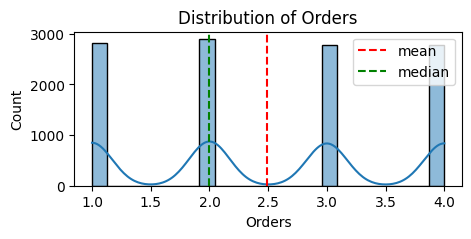

In [11]:
# plotting a histograme for Orders and it's count
plot_hist(df,"Orders")

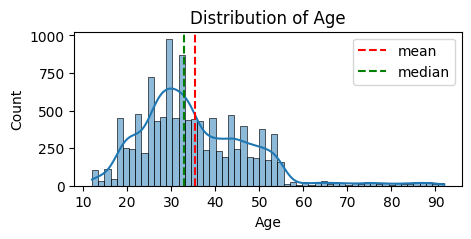

In [12]:
plot_hist(df,"Age")

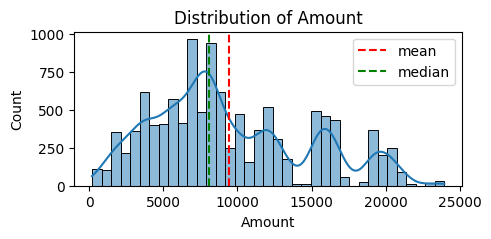

In [13]:
plot_hist(df,"Amount")

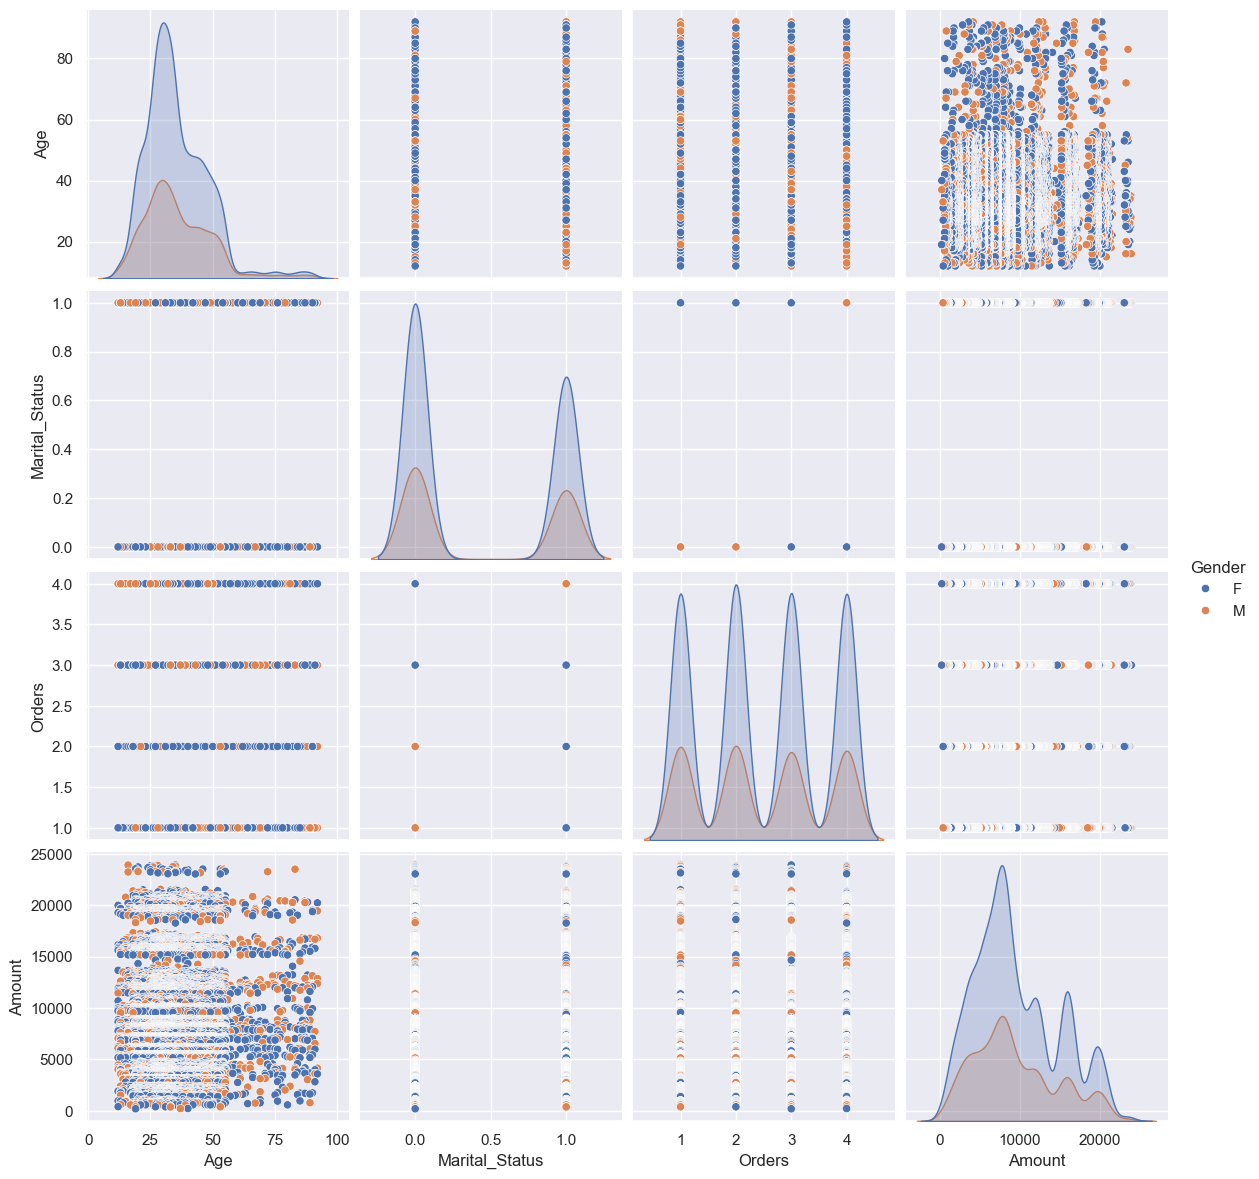

In [36]:
sns.pairplot(df,hue="Gender",height=3) # plot broken by Gender

ValueError: array length 1 does not match index length 11251

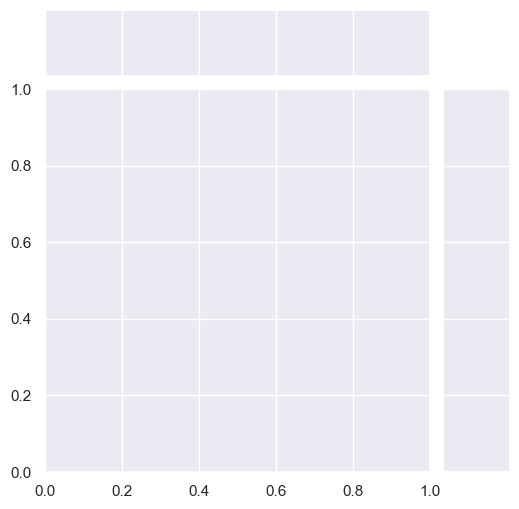

In [37]:
# Hexbinplot
sns.jointplot(x=df['Age'],y=['Amount'],kind='hex')

<Axes: xlabel='Gender', ylabel='Amount'>

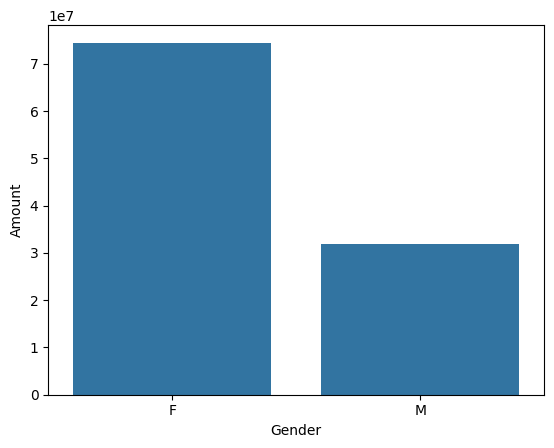

In [14]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

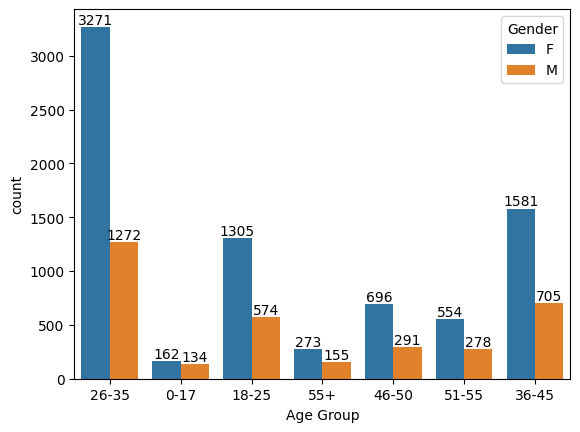

In [15]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

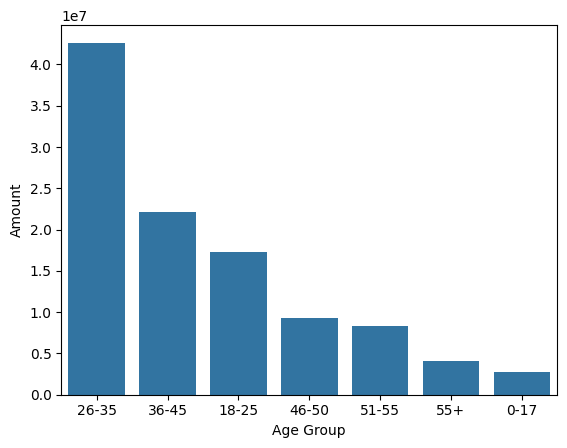

In [16]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

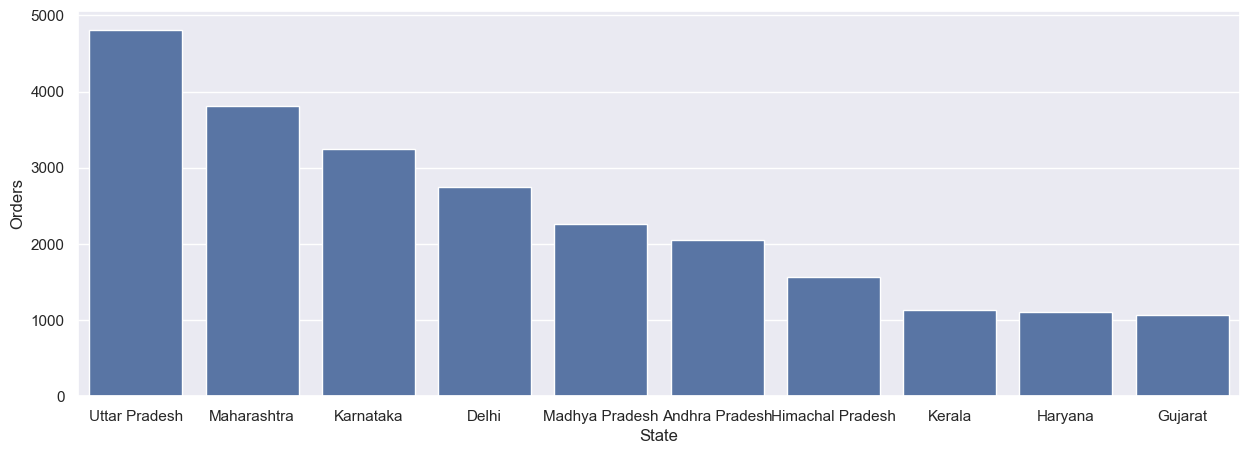

In [17]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

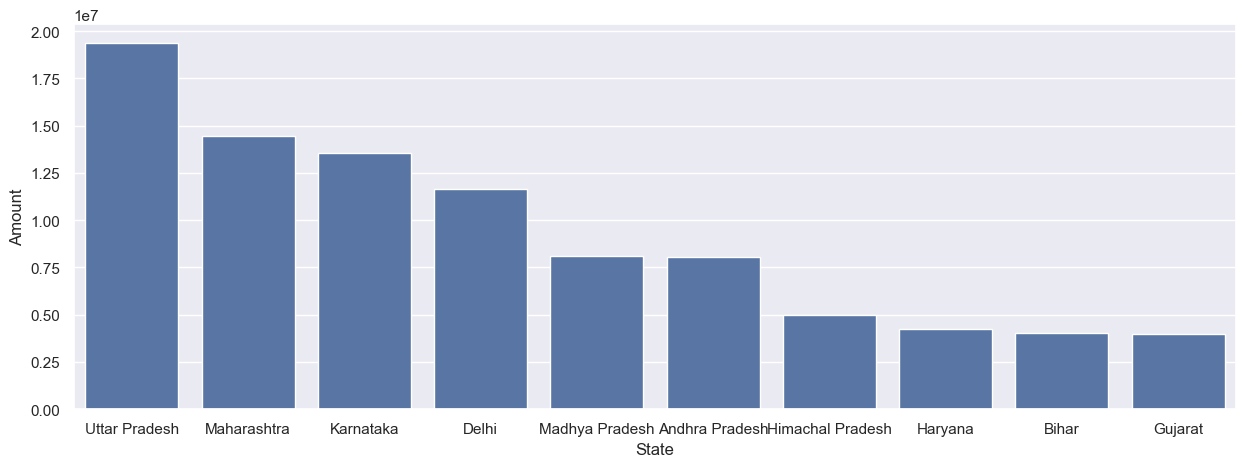

In [18]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

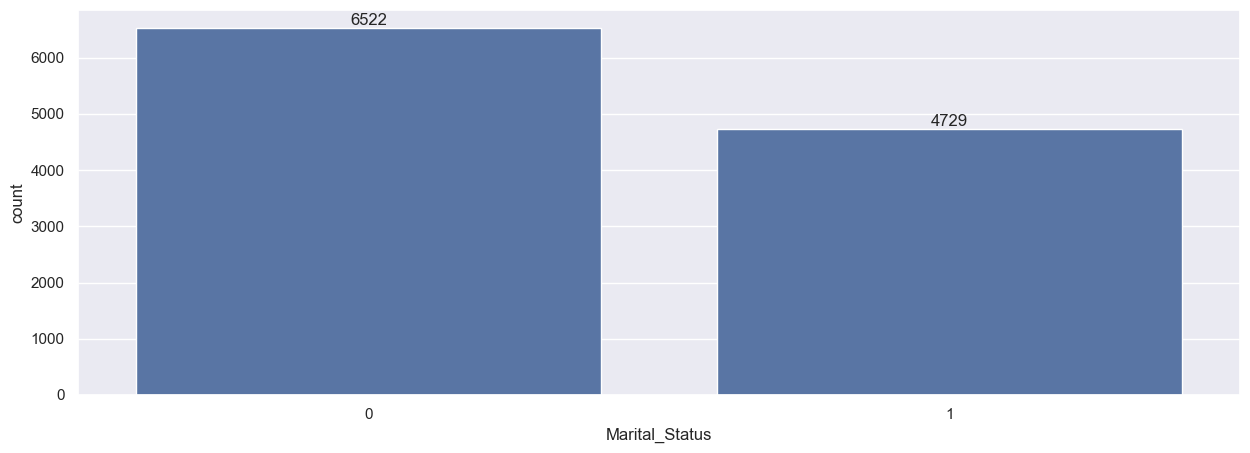

In [19]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

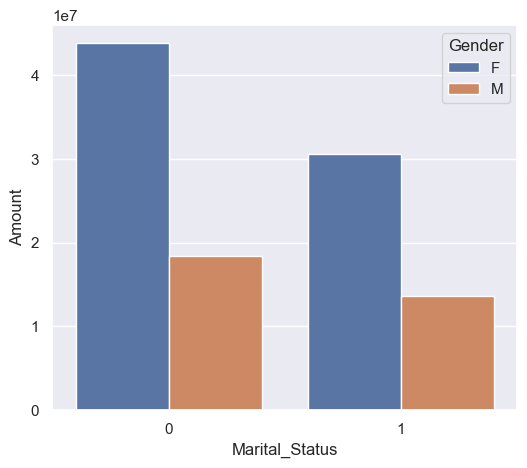

In [20]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

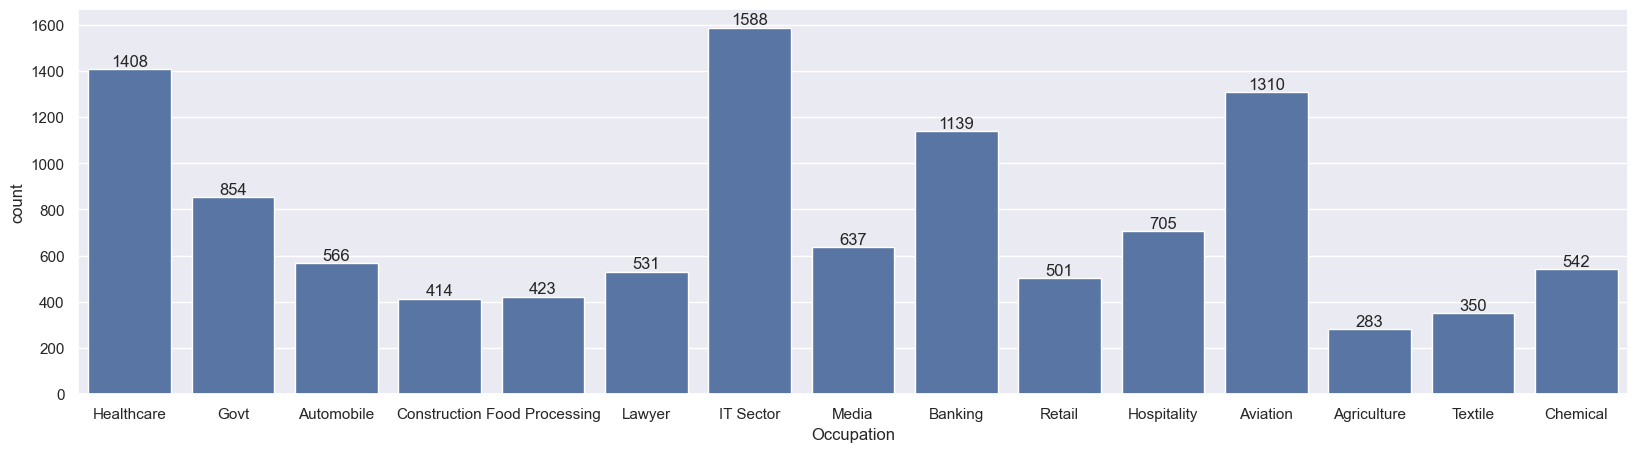

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

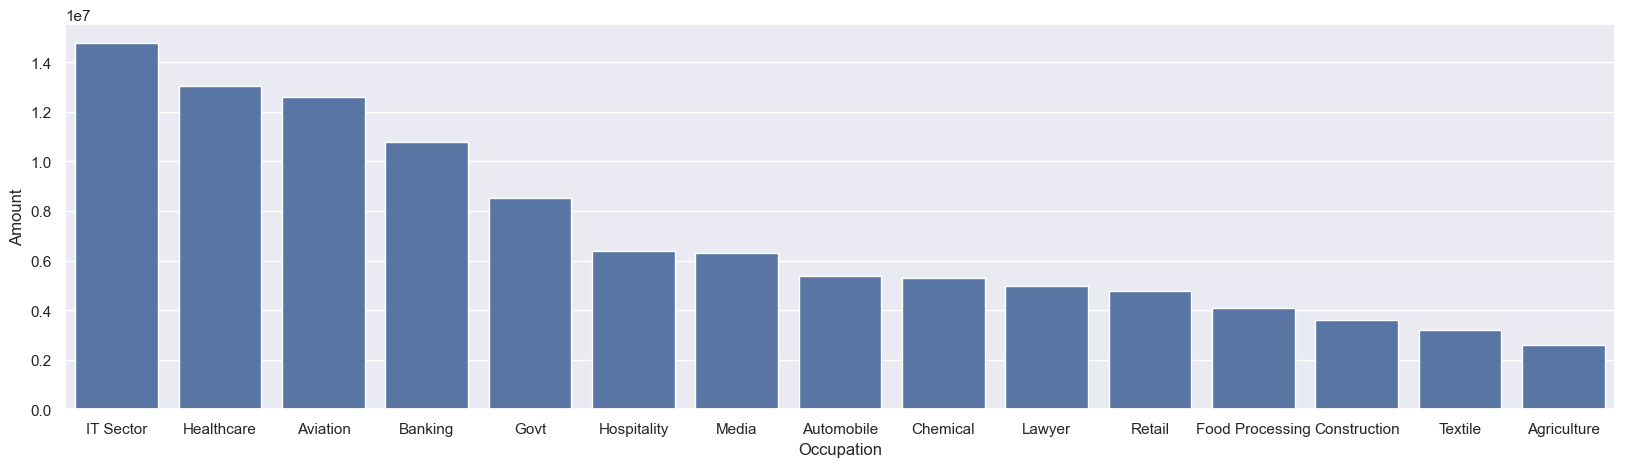

In [22]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

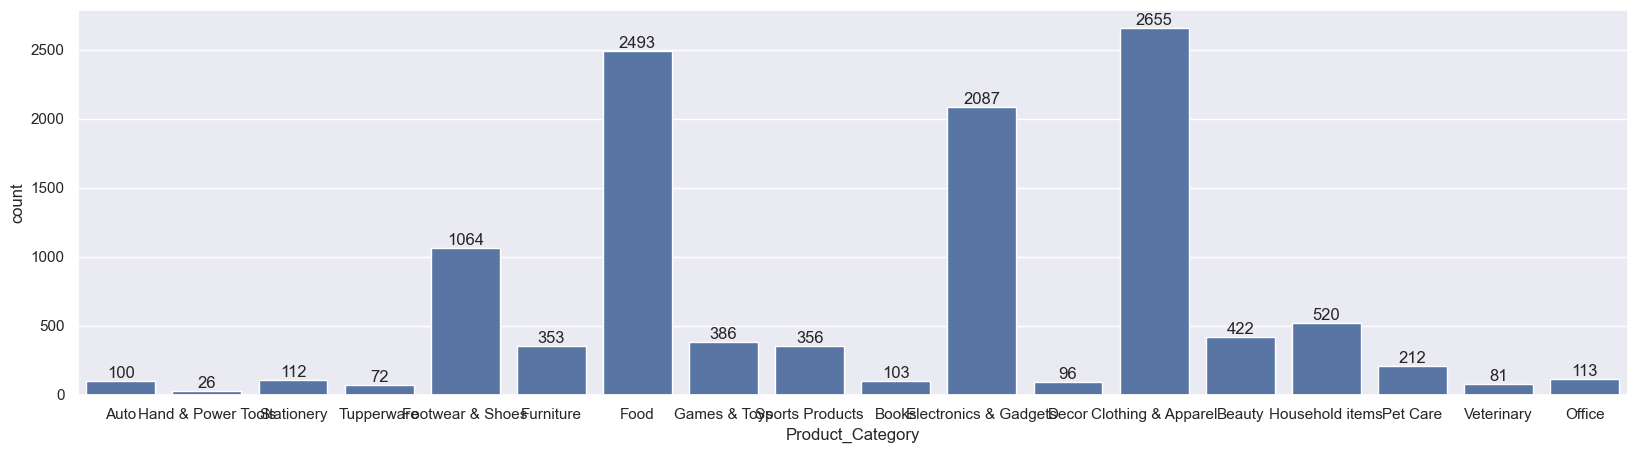

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

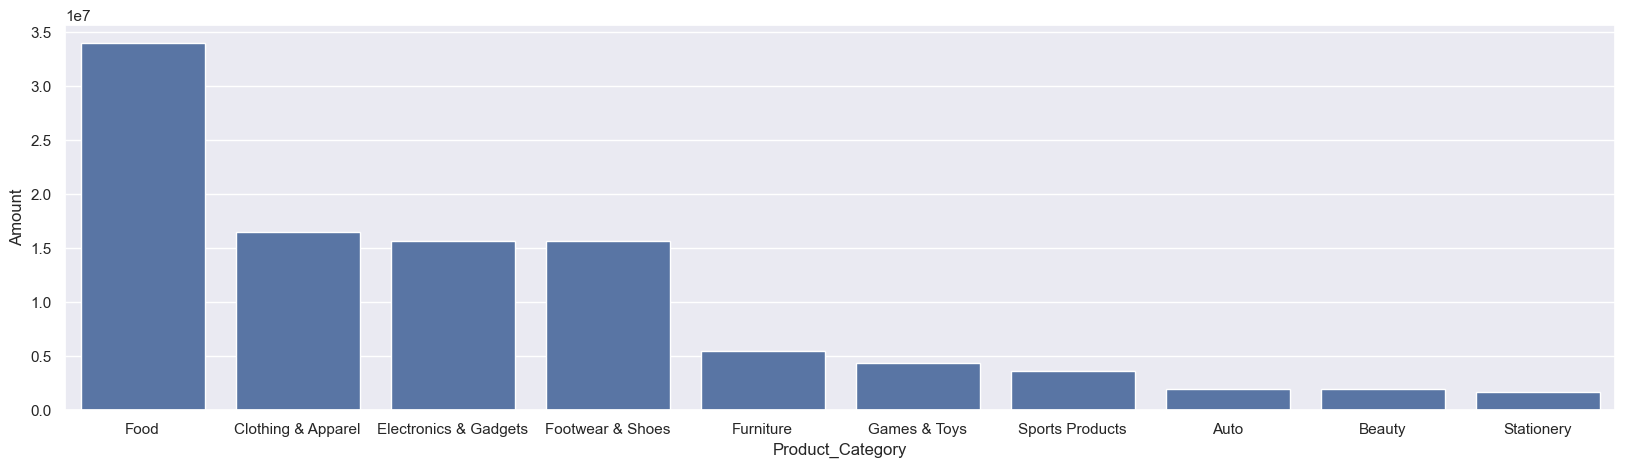

In [24]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

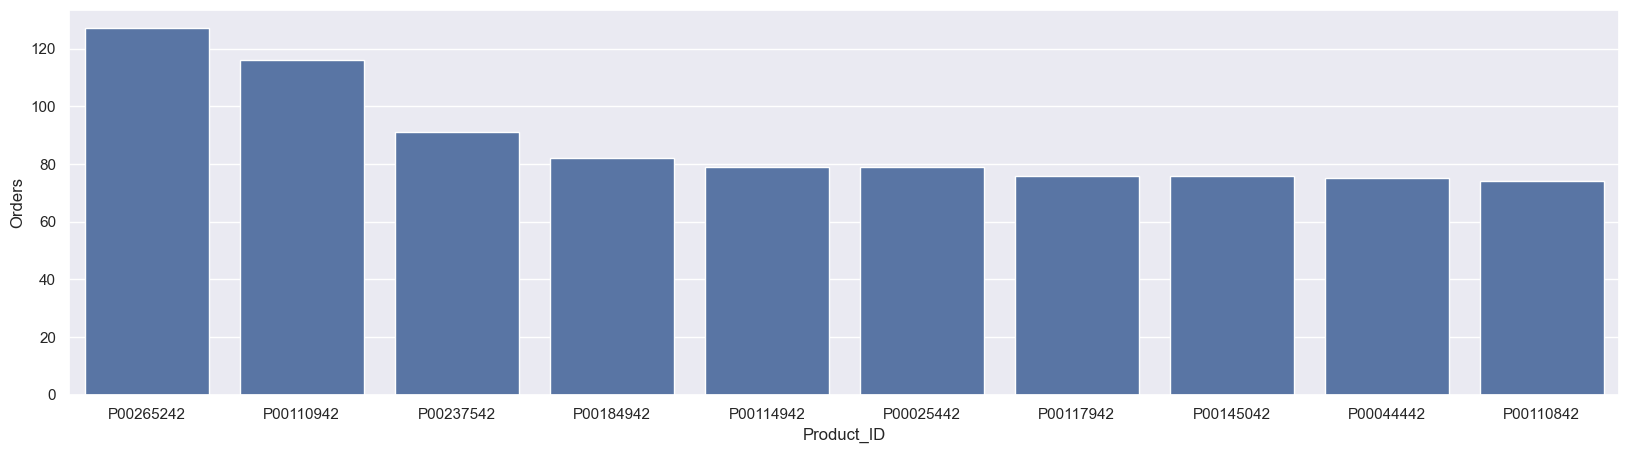

In [25]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

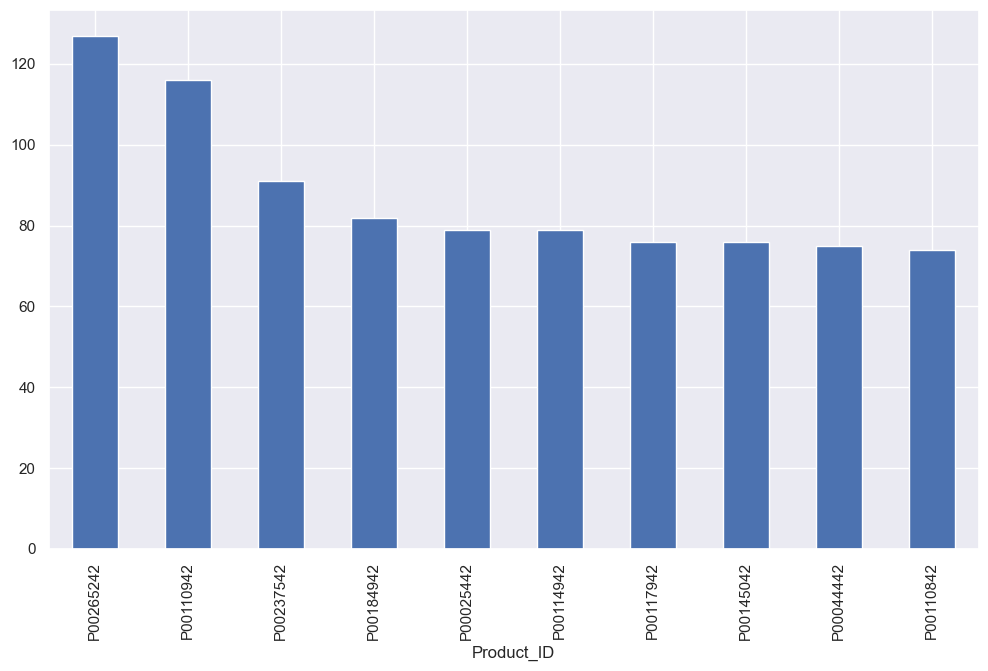

In [26]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!